In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,ConfusionMatrixDisplay,confusion_matrix,classification_report,PrecisionRecallDisplay,RocCurveDisplay


In [282]:
df=pd.read_csv('breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [283]:
df.shape

(569, 32)

In [284]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [285]:
df.isnull().any().value_counts()

False    32
Name: count, dtype: int64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [287]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [288]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [289]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [290]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [291]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [292]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [293]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 31) (114, 31) (455,) (114,)


In [294]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [295]:
y_train=np.array(y_train).reshape(1,-1)
y_test=np.array(y_test).reshape(1,-1)

In [296]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31, 455) (31, 114) (1, 455) (1, 114)


In [297]:
m_train=x_train.shape[1]
n_x=x_train.shape[0]
m_test=x_test.shape[1]
n_y=y_train.shape[0]

In [298]:
W=np.random.randn(n_x,1)*0.01
b=np.zeros((1,1))

In [299]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
mean=np.mean(x_train,axis=1,keepdims=True)
std=np.std(x_train,axis=1,keepdims=True)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std


In [300]:
def sigmoid(Z):
    Z = np.clip(Z, -500, 500) 
    A=1/(1+np.exp(-Z))
    return A

In [301]:
def forward_propagation(W,X,b):
    Z=np.dot(W.T,X)+b
    A=sigmoid(Z)
    return Z,A

In [302]:
def compute_cost(Y,A,m):
    epsilon = 1e-8
    cost=(-1/m)*np.sum(Y*np.log(A+epsilon)+(1-Y)*np.log(1-A+epsilon))
    cost=np.squeeze(cost)
    return cost

In [303]:
def backward_propagation(Y,X,A,m):
    dZ=A-Y
    dW=(1/m)*np.dot(X,dZ.T)
    db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
    return dW,db

In [304]:
def update_parameters(W,b,dW,db,learning_rate):
    W=W-(learning_rate*dW)
    b=b-(learning_rate*db)
    return W,b

In [305]:
def LogisticRegression(W,X,b,Y,m,num_iters,learning_rate):
    costs=[]
    for i in range(num_iters):
        Z,A=forward_propagation(W,X,b)
        cost=compute_cost(Y,A,m)
        dW,db=backward_propagation(Y,X,A,m)
        W,b=update_parameters(W,b,dW,db,learning_rate)
        if(len(costs)!=100):
            print(f"Cost after iteration {i+1}:",cost)
            costs.append(cost)
        else:
            break
    return W,b,costs



In [306]:
W,b,costs=LogisticRegression(W,x_train,b,y_train,m_train,1000,0.9)

Cost after iteration 1: 0.6947246926177776
Cost after iteration 2: 0.16868120755916163
Cost after iteration 3: 0.13642235769892325
Cost after iteration 4: 0.1208418761140316
Cost after iteration 5: 0.11289965141085335
Cost after iteration 6: 0.10749057019845783
Cost after iteration 7: 0.10322455487987084
Cost after iteration 8: 0.09967208391376882
Cost after iteration 9: 0.09663175424122356
Cost after iteration 10: 0.09398359047179683
Cost after iteration 11: 0.09164681574717151
Cost after iteration 12: 0.08956329439768185
Cost after iteration 13: 0.0876894462792162
Cost after iteration 14: 0.08599167817212633
Cost after iteration 15: 0.08444354720843875
Cost after iteration 16: 0.08302388695383879
Cost after iteration 17: 0.08171551524228916
Cost after iteration 18: 0.08050431473927341
Cost after iteration 19: 0.0793785626045358
Cost after iteration 20: 0.07832843201474098
Cost after iteration 21: 0.07734561526912494
Cost after iteration 22: 0.07642303469675855
Cost after iteration 23

In [307]:
len(costs)

100

In [308]:
def predict(W,b,X):
    Z=np.dot(W.T,X)+b
    A=sigmoid(Z)
    A=(A>=0.5).astype(int)
    return A

In [309]:
y_pred_train=predict(W,b,x_train)
y_pred_test=predict(W,b,x_test)



In [310]:
def accuracy(y_pred,y_true):
    return np.mean(y_pred==y_true)*100

In [311]:
train_accuracy = accuracy(y_pred_train, y_train)
test_accuracy = accuracy(y_pred_test, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 98.46%
Test Accuracy: 98.25%


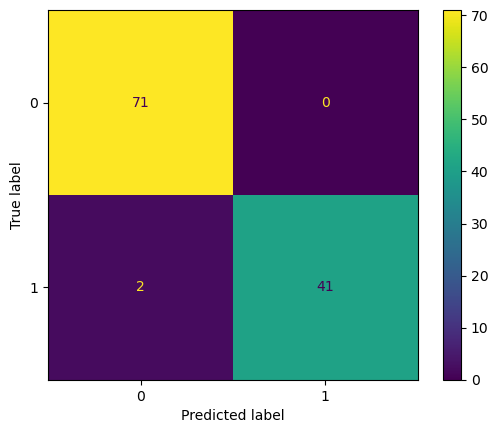

In [312]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(y_test.flatten(),y_pred_test.flatten())
ConfusionMatrixDisplay(cm).plot()


In [313]:
print(classification_report(y_test.flatten(),y_pred_test.flatten()))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



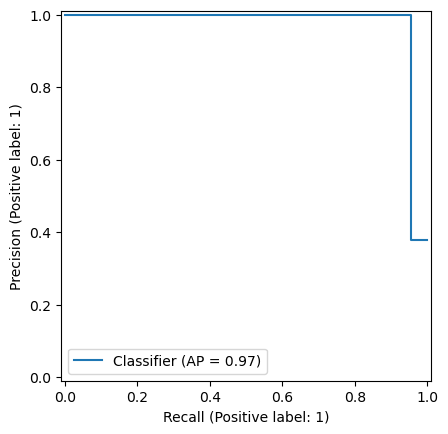

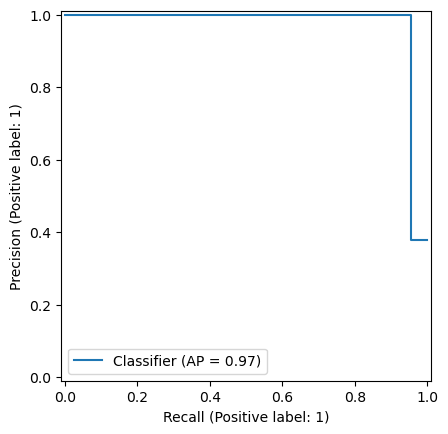

In [314]:
PrecisionRecallDisplay.from_predictions(y_test.flatten(),y_pred_test.flatten()).plot()

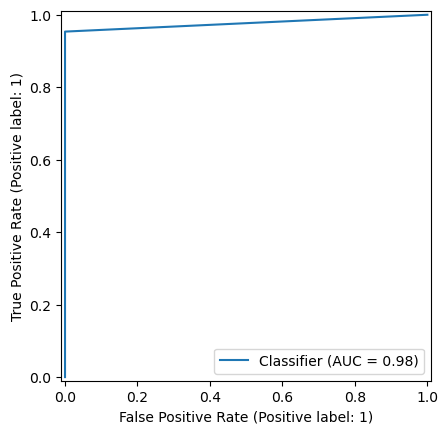

In [315]:
RocCurveDisplay.from_predictions(y_test.flatten(),y_pred_test.flatten())

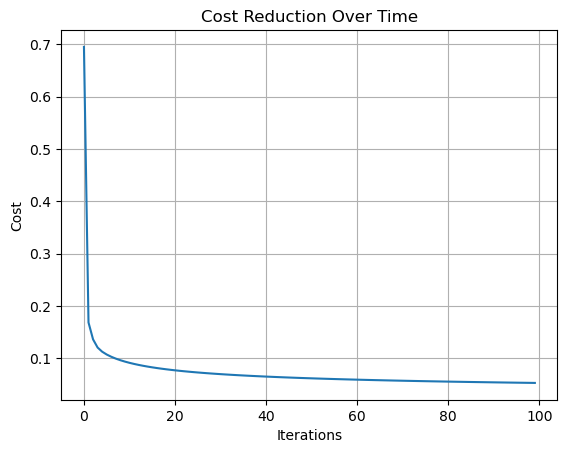

In [316]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.grid(True)
plt.show()